In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [163]:
# Wrap text
def wrap_text(draw, spacing_width, text, font, image=None, width=None):
    if image != None:
        image_width = image.size[0]
    if width != None:
        image_width = width
        
    text_array = text.split()
    line = ''
    lines = []
    
    while (len(text_array) != 0):
        while (draw.textsize(line + text_array[0], font=font)[0] < image_width - spacing_width * 2):
            line += text_array.pop(0) + ' '
            if (len(text_array) == 0):
                break
        lines.append(line.rstrip())
        line = ''
    return lines

# Add text
def add_text(image, spacing_width, spacing_height, text):
    font = ImageFont.truetype("./fonts/arial.ttf", 70)
    draw = ImageDraw.Draw(image)
    
    lines = wrap_text(draw, spacing_width, text, font, image=image)
    
    line_height = draw.textsize(",!@", font=font)[1]
    for i in range(len(lines)):
        line_width = draw.textsize(lines[i], font=font)[0]
        draw.text(
            (spacing_width, line_height*i + spacing_height//2),
            lines[i],
            fill='black',
            font=font
        )
    
    return image

In [164]:
def create_meme(text):
    image = Image.open('./src/image.jpg')
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("./fonts/arial.ttf", 70)
    
    spacing_width, spacing_height = image.size[0]//30, image.size[1]//30
    image_width, image_height = image.size[0] + spacing_width * 2, image.size[1] + spacing_height * 2
    
    text_height = draw.textsize(",!@", font=font)[1]
    lines = wrap_text(draw, spacing_width, text, font, width=image_width)
    
    background = Image.new('RGB', (image_width, image_height + text_height * len(lines)), '#f9f9f9')
    background.paste(image, (spacing_width, text_height * len(lines) + spacing_height))
    return background, spacing_width, spacing_height

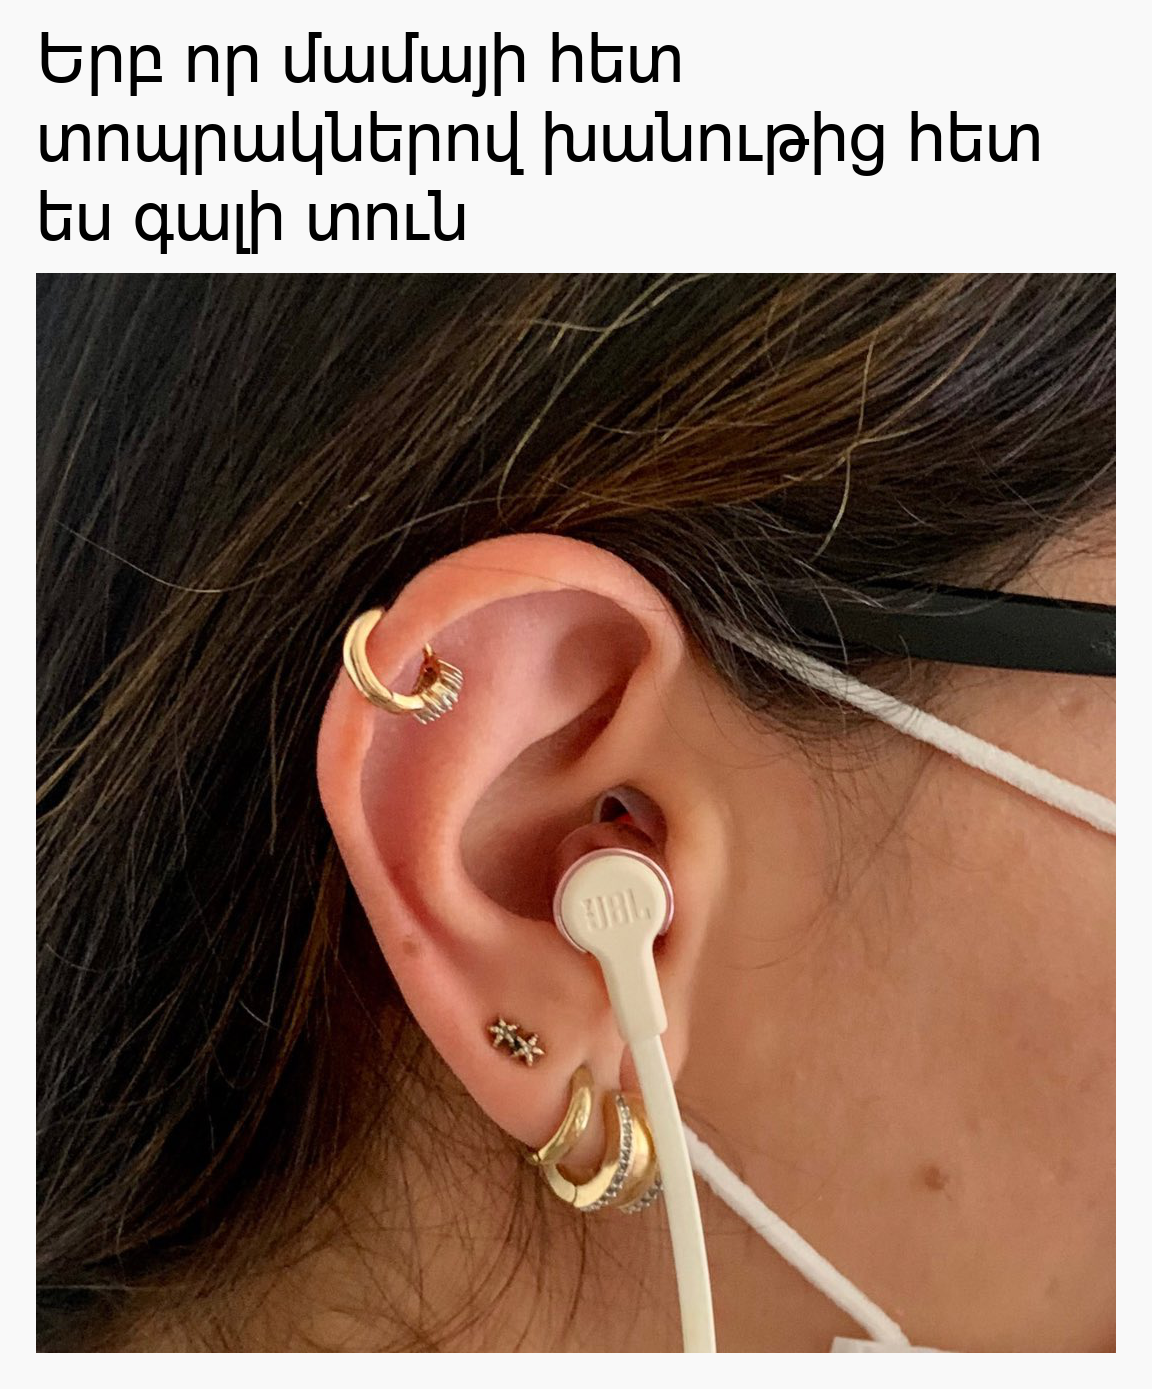

In [166]:
# Creating image
text = "Երբ որ մամայի հետ տոպրակներով խանութից հետ ես գալի տուն"
image, spacing_width, spacing_height = create_meme(text)
image = add_text(image, spacing_width, spacing_height, text)
display(image)